# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Dfs

0.4 Preparatory work

    0.5.1 df_user_subset where each row = 1 user
    0.5.2 df_order_subset where each row = 1 order 
    0.5.3 df_items_subset where each row = 1 item
    0.5.4 Random sample of 30% of the data

0.5 Defining styles, formats, and commonly used variables

0.6 Exploration of data by region

    0.6.1 Items - total, avg by order
    0.6.2 Gross sales - total, avg by order
    0.6.3 Gross sales by dept; percent of items as low, mid, high-range
    0.6.4 Ordering habits - day of week, time of day, frequency

   


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4 Defining styles and label formats

In [13]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [14]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [15]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [16]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

### 0.4.1 Subset df with each row = 1 user

In [17]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [18]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [19]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False


In [20]:
df_user_subset.shape

(32434489, 20)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [21]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [22]:
# Checking new shape
df_user_subset.shape

(206209, 20)

In [23]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,West,False,"1,465.60",195,13.93,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,West,False,721.40,88,7.33,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,South,False,147.70,18,3.60,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,West,True,340.00,37,9.25,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

### 0.4.2 Subset of df where each row = 1 order

In [24]:
# Create a temporary df to use for visualizations that should be per order
# rather than per item 
df_order_subset = pd.DataFrame()

In [25]:
df_order_subset = df[['order_id', 
                     'user_id', 
                     'order_day_of_week',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'first_order_of_new_customer',
                     'max_order', 
                     'loyalty_flag', 
                     'spender_type', 
                     'frequent_shopper', 
                     'gender', 
                     'age', 
                     'n_dependants', 
                     'fam_status', 
                     'income', 
                     'income_group', 
                     'region', 
                     'low_activity_flag', 
                     'total_spent_in_order', 
                     'total_spent_in_lifetime', 
                     'total_items_in_lifetime', 
                     'avg_items_per_order_by_user', 
                     'baby_parent', 
                     'pet_owner', 
                     'senior_citizen', 
                     'two_parent_fam', 
                     'single_parent']]

In [26]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
1,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
2,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
3,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
4,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False


In [27]:
df_order_subset.shape

(32434489, 27)

In [28]:
# Remove duplicate rows
df_order_subset = df_order_subset.drop_duplicates()

In [29]:
# Checking new shape
df_order_subset.shape

(3214874, 27)

In [30]:
# Confirming uniqueness of order_id s
df_order_subset['order_id'].nunique()

3214874

In [31]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.60,375.70,59,5.90,False,False,False,True,False
5,2398795,1,3,7,15.00,False,10,New customer,Low spender,Regular customer,...,False,35.40,375.70,59,5.90,False,False,False,True,False
11,473747,1,3,12,21.00,False,10,New customer,Low spender,Regular customer,...,False,28.20,375.70,59,5.90,False,False,False,True,False
16,2254736,1,4,7,29.00,False,10,New customer,Low spender,Regular customer,...,False,26.00,375.70,59,5.90,False,False,False,True,False
21,431534,1,4,15,28.00,False,10,New customer,Low spender,Regular customer,...,False,57.00,375.70,59,5.90,False,False,False,True,False


Now we have a df with just the 3,214,874 orders each on their own row

In [32]:
# Let's add the number of items in each order to this df

# First we create a temp df to hold that information
temp = pd.DataFrame(df.groupby('order_id').add_to_cart_order.max())
temp.head()

,add_to_cart_order
order_id,
2,9
3,8
4,13
5,26
6,3


In [33]:
# Merge this data with the df_order_subset

df_order_subset = df_order_subset.merge(temp, on = ['order_id'], how='left', indicator = True)

In [34]:
# Confirming that all rows got a value
df_order_subset['_merge'].value_counts()

both          3214874
left_only           0
right_only          0
Name: _merge, dtype: int64

In [35]:
# Dropping the merge field as no longer necessary
df_order_subset = df_order_subset.drop(columns = '_merge')

In [36]:
# Rename column to be more meaningful for this df
df_order_subset = df_order_subset.rename(columns = {'add_to_cart_order':'n_items_in_order'})

In [37]:
# Confirming everything looks fine
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,n_items_in_order
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,31.60,375.70,59,5.90,False,False,False,True,False,5
1,2398795,1,3,7,15.00,False,10,New customer,Low spender,Regular customer,...,35.40,375.70,59,5.90,False,False,False,True,False,6
2,473747,1,3,12,21.00,False,10,New customer,Low spender,Regular customer,...,28.20,375.70,59,5.90,False,False,False,True,False,5
3,2254736,1,4,7,29.00,False,10,New customer,Low spender,Regular customer,...,26.00,375.70,59,5.90,False,False,False,True,False,5
4,431534,1,4,15,28.00,False,10,New customer,Low spender,Regular customer,...,57.00,375.70,59,5.90,False,False,False,True,False,8


### 0.4.3 Subset of df where each row = 1 item

In [38]:
# Create a temporary df to use for visualizations that should be per unique item
# rather than per iteration of an item ordered
df_items_subset = pd.DataFrame()

In [39]:
df_items_subset = df[['product_id', 
                     'product_name', 
                     'department_id',
                     'price',
                     'product_info_available',
                     'price_available',
                     'price_range']]

In [40]:
df_items_subset.head()

,product_id,product_name,department_id,price,product_info_available,price_available,price_range
0,196,Soda,7.00,9.00,True,True,Mid-range product
1,14084,Organic Unsweetened Vanilla Almond Milk,16.00,12.50,True,True,Mid-range product
2,12427,Original Beef Jerky,19.00,4.40,True,True,Low-range product
3,26088,Aged White Cheddar Popcorn,19.00,4.70,True,True,Low-range product
4,26405,XL Pick-A-Size Paper Towel Rolls,17.00,1.00,True,True,Low-range product


In [41]:
df_items_subset.shape

(32434489, 7)

In [42]:
# Remove duplicate rows
df_items_subset = df_items_subset.drop_duplicates()

In [43]:
# Checking new shape
df_items_subset.shape

(49677, 7)

In [44]:
# Confirming uniqueness of product_id s
df_items_subset['product_id'].nunique()

49677

In [45]:
# Let's add the department names to this df
# Merge dept name to allow for easier visualizations
df_items_subset = pd.merge(df_items_subset, dept_data[['department_id', 'department']], on = ['department_id'], how='left')

In [46]:
df_items_subset.head()

,product_id,product_name,department_id,price,product_info_available,price_available,price_range,department
0,196,Soda,7.00,9.00,True,True,Mid-range product,beverages
1,14084,Organic Unsweetened Vanilla Almond Milk,16.00,12.50,True,True,Mid-range product,dairy eggs
2,12427,Original Beef Jerky,19.00,4.40,True,True,Low-range product,snacks
3,26088,Aged White Cheddar Popcorn,19.00,4.70,True,True,Low-range product,snacks
4,26405,XL Pick-A-Size Paper Towel Rolls,17.00,1.00,True,True,Low-range product,household


### 0.4.4 Random sampling of 30% of data 

In [47]:
# Assign a random number between 0-1 to each row of the df
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [48]:
# Split the df into two samples
# big = 70% of df
# small = 30% of df
big = df[dev]
small = df[~dev]

In [49]:
# Compare the sample dfs to the original
len(df)

32434489

In [50]:
len(big) + len(small)

32434489

This random sampling can be used for any line charts where using the full df would be too memory-intensive.

### 0.5 Defining styles and label formats

In [51]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [52]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [53]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [54]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [55]:
# Setting up some commonly needed variables

# Calculating the gross sales for the entire df
total_gross=df['price'].sum()
total_gross

252418420.0

In [56]:
# Calculating the total items for the entire df
total_items=len(df)
total_items

32434489

In [57]:
# Calculating the total users 
total_users=len(df_user_subset)
total_users

206209

In [58]:
# Calculating the total orders 
total_orders=len(df_order_subset)
total_orders

3214874

In [59]:
# Calculating number of unique items
total_unique_items = len(df_items_subset)
total_unique_items

49677

### 0.6.1 Price_range explorations

In [60]:
# Identifying which profile we are investigating
profile = 'price_range'
profile_label = 'Price Range'
labels_inc = ['Low-range product', 'Mid-range product', 'High-range product']
labels_dec = ['High-range product', 'Mid-range product', 'Low-range product']
labels = ['High-range product', 'Low-range product', 'Mid-range product']
colors = ['saddlebrown', '#ff8200', 'peachpuff']
colors_r = ['peachpuff', '#ff8200', 'saddlebrown']
prof1 = 'Low-range product'
prof2 = 'Mid-range product'
prof3 = 'High-range product'

### 0.6.1  Items

In [61]:
# Finding the number of unique items in each price range
item_count = pd.DataFrame(df_items_subset[profile].value_counts())
item_count

,price_range
Mid-range product,32820
Low-range product,16290
High-range product,545


In [62]:
# Finding the percentage of unique items in each price range
item_percent = pd.DataFrame(item_count/total_unique_items)
item_percent

,price_range
Mid-range product,0.66
Low-range product,0.33
High-range product,0.01


Text(0.5, 1.0, 'Histogram of Prices of Unique Items')

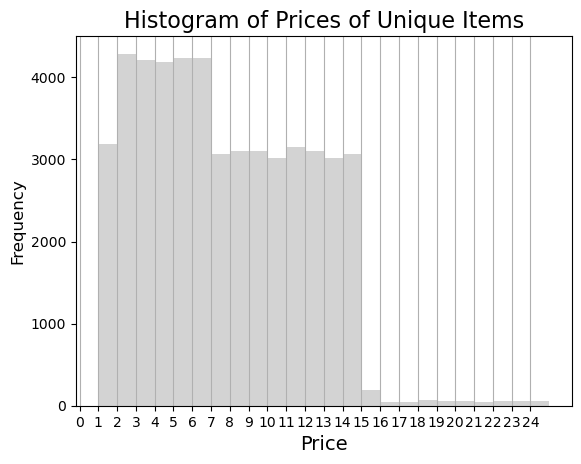

In [75]:
# Making histogram of prices of unique items
hist_prices = df_items_subset['price'].plot.hist(bins = 24, 
                                                 color = 'lightgrey')

# Format labels and titles for clarity
hist_xticks = np.arange(0,25,1)
plt.xticks(hist_xticks)
plt.xlabel("Price", size=14)
plt.grid(axis = 'x')

plt.ylabel("Frequency", size=12 )

plt.title ("Histogram of Prices of Unique Items", size=16)

In [63]:
# Finding the number of items sold in each price range
total_item_count = pd.DataFrame(df[profile].value_counts())
total_item_count

,price_range
Mid-range product,21860282
Low-range product,10125759
High-range product,412551


Text(0.5, 1.0, 'Histogram of Prices of All Items Sold')

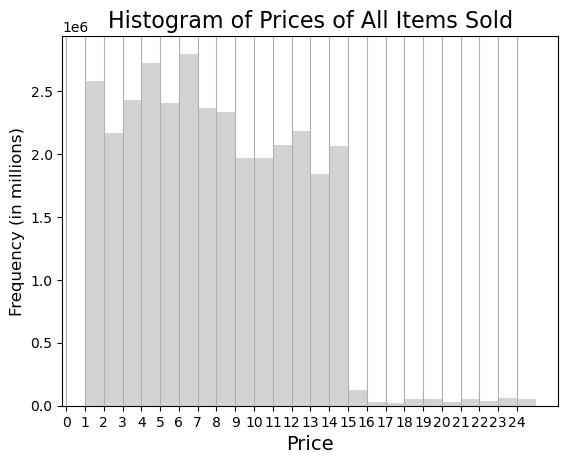

In [76]:
# Making histogram of prices across the entire df
hist_prices = df['price'].plot.hist(bins = 24, color = 'lightgrey')

# Format labels and titles for clarity
hist_xticks = np.arange(0,25,1)
plt.xticks(hist_xticks)
plt.xlabel("Price", size=14)
plt.grid(axis = 'x')

plt.ylabel("Frequency (in millions)", size=12 )

plt.title ("Histogram of Prices of All Items Sold", size=16)

####     0.6.2 Gross sales - total, avg by order

In [78]:
# Calculating the gross sales for each price_range
gross_by_price_group = pd.DataFrame(df.groupby('price_range').price.sum())

In [79]:
gross_by_price_group

,price
price_range,
High-range product,"8,502,571.00"
Low-range product,"30,612,970.00"
Mid-range product,"213,302,832.00"


In [80]:
# Rename column to be more desciptive
gross_by_price_group.rename(columns={'price':'gross_sales'}, inplace=True)

In [81]:
gross_by_price_group

,gross_sales
price_range,
High-range product,"8,502,571.00"
Low-range product,"30,612,970.00"
Mid-range product,"213,302,832.00"


In [82]:
# Create a column with the percent of gross sales for each price_range
gross_by_price_group['percent_of_gross'] = gross_by_price_group['gross_sales']/total_gross

In [83]:
gross_by_price_group

,gross_sales,percent_of_gross
price_range,,
High-range product,"8,502,571.00",0.03
Low-range product,"30,612,970.00",0.12
Mid-range product,"213,302,832.00",0.85


In [84]:
# Reset the index so the correct column headers will appear
gross_by_price_group = gross_by_price_group.reset_index()

In [85]:
gross_by_price_group

,price_range,gross_sales,percent_of_gross
0,High-range product,"8,502,571.00",0.03
1,Low-range product,"30,612,970.00",0.12
2,Mid-range product,"213,302,832.00",0.85


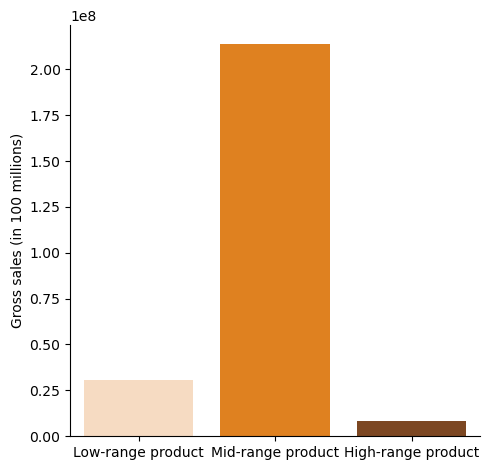

In [185]:
# Create a bar plot for gross sales by price_range
price_range_plot = sns.catplot(x='price_range', 
                               y='gross_sales', 
                               kind='bar', 
                               order=['Low-range product', 'Mid-range product', 'High-range product'], 
                               palette=['peachpuff', '#ff8200', 'saddlebrown'],
                               data=gross_by_price_group)

# Format labels and titles for clarity
plt.ylabel('Gross sales (in 100 millions)')
plt.xlabel('')

plt.show()

In [186]:
# Create filename for export
filename = profile+'_gross_sales2.png'
filename

'price_range_gross_sales2.png'

In [187]:
# Exporting bar chart
price_range_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

#### 0.6.3 gross sales by dept; percent of items as low, mid, high-range

In [64]:
# Create temp df to hold gross_price_range_by_dept
gross_price_range_by_dept = pd.DataFrame(df.groupby(['department_id','price_range']).price.sum())

In [65]:
gross_price_range_by_dept

price
department_id price_range                     
1.00          High-range product          0.00
              Low-range product   2,034,591.25
              Mid-range product  15,254,616.00
2.00          High-range product          0.00
              Low-range product      44,759.40
...                                        ...
20.00         Low-range product     878,335.69
              Mid-range product   7,299,016.00
21.00         High-range product          0.00
              Low-range product      68,161.40
              Mid-range product     530,683.81

[63 rows x 1 columns]

In [66]:
# Rename column to be more desciptive
gross_price_range_by_dept.rename(columns={'price':'price_range_gross'}, inplace=True)

In [67]:
# Reset the index so the correct column headers will appear
gross_price_range_by_dept = gross_price_range_by_dept.reset_index()

In [68]:
# Adjusting the type of the department_id so it will match other sources
# when/if a merge or loc is needed
gross_price_range_by_dept['department_id'] = gross_price_range_by_dept['department_id'].astype('int')

In [69]:
gross_price_range_by_dept

,department_id,price_range,price_range_gross
0,1,High-range product,0.00
1,1,Low-range product,"2,034,591.25"
2,1,Mid-range product,"15,254,616.00"
3,2,High-range product,0.00
4,2,Low-range product,"44,759.40"
...,...,...,...
58,20,Low-range product,"878,335.69"
59,20,Mid-range product,"7,299,016.00"
60,21,High-range product,0.00
61,21,Low-range product,"68,161.40"


In [70]:
# Pulling each of the price_groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

high_gross = pd.DataFrame(gross_price_range_by_dept[gross_price_range_by_dept['price_range']=='High-range product'])
mid_gross = pd.DataFrame(gross_price_range_by_dept[gross_price_range_by_dept['price_range']=='Mid-range product'])
low_gross = pd.DataFrame(gross_price_range_by_dept[gross_price_range_by_dept['price_range']=='Low-range product'])

In [71]:
# Rename columns to be more desciptive
high_gross.rename(columns={'price_range_gross':'high_gross'}, inplace=True)
mid_gross.rename(columns={'price_range_gross':'mid_gross'}, inplace=True)
low_gross.rename(columns={'price_range_gross':'low_gross'}, inplace=True)

In [72]:
# Removing unnecessary columns
high_gross = high_gross.drop(columns = ['price_range'])
mid_gross = mid_gross.drop(columns = ['price_range'])
low_gross = low_gross.drop(columns = ['price_range'])

In [91]:
# Merge temp dfs
combo_gross_by_dept = low_gross.merge(mid_gross, on = 'department_id', how='left')

In [92]:
combo_gross_by_dept = combo_gross_by_dept.merge(high_gross, on = 'department_id', how='left')

In [93]:
# Merge dept name to allow for easier visualizations
combo_gross_by_dept = pd.merge(combo_gross_by_dept, dept_data[['department_id', 'department']], on = ['department_id'], how='left')

In [94]:
combo_gross_by_dept

,department_id,low_gross,mid_gross,high_gross,department
0,1,"2,034,591.25","15,254,616.00",0.00,frozen
1,2,"44,759.40","208,948.59",0.00,other
2,3,"917,837.00","8,290,189.00",0.00,bakery
3,4,"7,915,640.50","67,745,296.00",0.00,produce
4,5,"102,518.90","1,149,135.38",0.00,alcohol
5,6,"237,077.00","1,831,395.75",0.00,international
6,7,"2,555,253.25","18,090,830.00",0.00,beverages
7,8,"94,037.80","676,850.62",0.00,pets
8,9,"857,222.12","5,512,731.50",0.00,dry goods pasta
9,10,"5,551.40","283,097.19",0.00,bulk


In [95]:
# Set the department name to be used as the index
combo_gross_by_dept = combo_gross_by_dept.set_index('department')

In [96]:
combo_gross_by_dept

,department_id,low_gross,mid_gross,high_gross
department,,,,
frozen,1,"2,034,591.25","15,254,616.00",0.00
other,2,"44,759.40","208,948.59",0.00
bakery,3,"917,837.00","8,290,189.00",0.00
produce,4,"7,915,640.50","67,745,296.00",0.00
alcohol,5,"102,518.90","1,149,135.38",0.00
international,6,"237,077.00","1,831,395.75",0.00
beverages,7,"2,555,253.25","18,090,830.00",0.00
pets,8,"94,037.80","676,850.62",0.00
dry goods pasta,9,"857,222.12","5,512,731.50",0.00


In [97]:
# Drop the department_id column so it doesn't interfere with visualizations
combo_gross_by_dept = combo_gross_by_dept.drop(columns = ['department_id'])

In [98]:
# Sort departments by alphabetical order for more consistent look to axes
combo_gross_by_dept_sort = combo_gross_by_dept.sort_values('department', ascending=False)

In [99]:
combo_gross_by_dept_sort

,low_gross,mid_gross,high_gross
department,,,
snacks,"5,956,713.50","6,388,824.50",0.00
produce,"7,915,640.50","67,745,296.00",0.00
pets,"94,037.80","676,850.62",0.00
personal care,"407,437.41","3,165,735.25",0.00
pantry,"1,582,612.75","13,433,488.00","4,560.00"
other,"44,759.40","208,948.59",0.00
missing,"68,161.40","530,683.81",0.00
meat seafood,0.00,"3,053,559.00","8,498,011.00"
international,"237,077.00","1,831,395.75",0.00


In [100]:
# Transpose the df to work better with some visualizations
combo_gross_by_dept_t = combo_gross_by_dept_sort.transpose()

In [101]:
combo_gross_by_dept_t

department,snacks,produce,pets,personal care,pantry,other,missing,meat seafood,international,household,...,dry goods pasta,deli,dairy eggs,canned goods,bulk,breakfast,beverages,bakery,babies,alcohol
low_gross,"5,956,713.50","7,915,640.50","94,037.80","407,437.41","1,582,612.75","44,759.40","68,161.40",0.00,"237,077.00","732,924.12",...,"857,222.12","878,335.69","4,129,826.00","996,072.00","5,551.40","698,405.31","2,555,253.25","917,837.00","397,992.41","102,518.90"
mid_gross,"6,388,824.50","67,745,296.00","676,850.62","3,165,735.25","13,433,488.00","208,948.59","530,683.81","3,053,559.00","1,831,395.75","4,721,428.50",...,"5,512,731.50","7,299,016.00","40,824,668.00","7,057,060.00","283,097.19","4,946,220.50","18,090,830.00","8,290,189.00","2,839,056.25","1,149,135.38"
high_gross,0.00,0.00,0.00,0.00,"4,560.00",0.00,0.00,"8,498,011.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


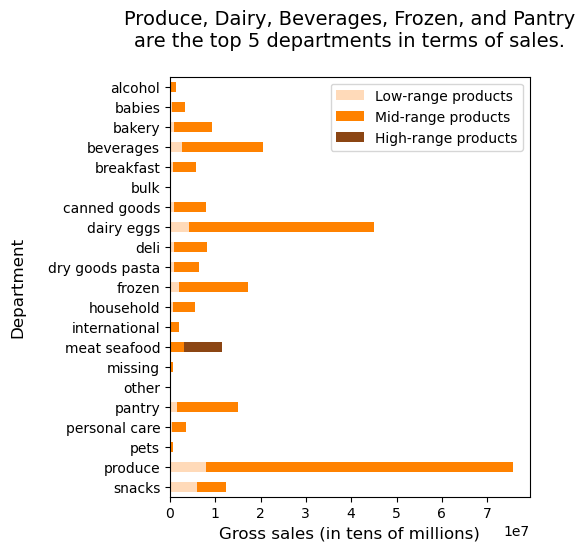

In [102]:
# Create a stacked column plot showing the proportion 
# of sales for each price_range in each dept.

price_range_dept_plot = combo_gross_by_dept_sort.plot(kind='barh',
                   stacked=True,
                   figsize=(6,7),
                   color=colors_r)


# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.3)

# Format labels and titles for clarity
plt.legend(['Low-range products', 'Mid-range products', 'High-range products'], 
           loc='upper right', ncol=1)
plt.xlabel('Gross sales (in tens of millions)', size=12)
plt.ylabel('Department\n', size=12)
plt.title('Produce, Dairy, Beverages, Frozen, and Pantry\nare the top 5 departments in terms of sales.\n',
         size=14)
        
plt.show()

In [103]:
# Create temp df to hold dept totals for annotations
temp = dept_data[['department', 'total_spent_in_dept']].sort_values('department', ascending=False)

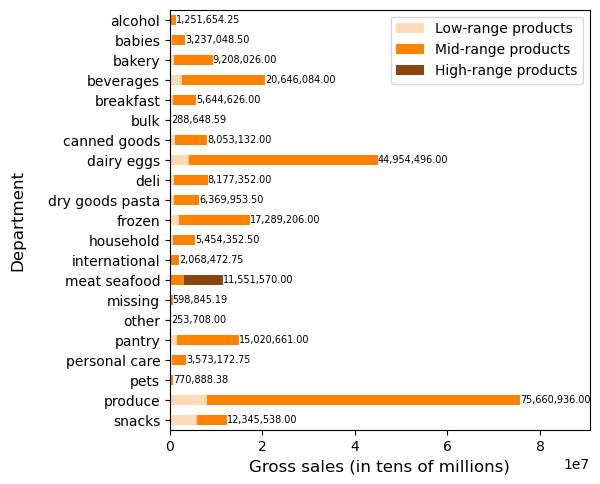

In [105]:
# Create a stacked column plot showing the proportion 
# of sales for each price_range in each dept.

price_range_dept_plot = combo_gross_by_dept_sort.plot(kind='barh',
                   stacked=True,
                   figsize=(7,7),
                   color=colors_r)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.3)
plt.margins(0.2)

# add values
for y, x in enumerate(temp['total_spent_in_dept']):
    #plt.annotate(str(x), xy=(x, y), va='center', size=7)
    plt.annotate('{:,.2f}'.format(x), xy=(x, y), va='center', size=7)

# Format labels and titles for clarity


plt.legend(['Low-range products', 'Mid-range products', 'High-range products' ], 
           loc='upper right', ncol=1)
plt.xlabel('Gross sales (in tens of millions)', size=12)
plt.ylabel('Department\n', size=12)
        
plt.show()

In [106]:
# Create filename for export
filename = profile+'_gross_dept_sales_w_totals.png'
filename

'price_range_gross_dept_sales_w_totals.png'

In [107]:
# Exporting bar chart
price_range_dept_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [161]:
# Merging the total per department to create a table of proportions/percents
# of gross sales by price_range
combo_gross_by_dept_prop = pd.merge(combo_gross_by_dept_sort, dept_data[['department', 'total_spent_in_dept']], on = ['department'], how='left')

In [162]:
# Set the department name to be used as the index
combo_gross_by_dept_prop = combo_gross_by_dept_prop.set_index('department')

In [163]:
combo_gross_by_dept_prop.head()

,high_gross,mid_gross,low_gross,total_spent_in_dept
department,,,,
snacks,0.00,"6,388,824.50","5,956,713.50","12,345,538.00"
produce,0.00,"67,745,296.00","7,915,640.50","75,660,936.00"
pets,0.00,"676,850.62","94,037.80","770,888.38"
personal care,0.00,"3,165,735.25","407,437.41","3,573,172.75"
pantry,"4,560.00","13,433,488.00","1,582,612.75","15,020,661.00"


In [164]:
# Creating proportional fields
combo_gross_by_dept_prop['high_prop'] = combo_gross_by_dept_prop['high_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop['mid_prop'] = combo_gross_by_dept_prop['mid_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop['low_prop'] = combo_gross_by_dept_prop['low_gross']/combo_gross_by_dept_prop['total_spent_in_dept']

In [165]:
# Drop the columns that are no longer needed
combo_gross_by_dept_prop = combo_gross_by_dept_prop.drop(columns = ['high_gross', 'mid_gross', 'low_gross', 'total_spent_in_dept' ])


In [166]:
combo_gross_by_dept_prop

,high_prop,mid_prop,low_prop
department,,,
snacks,0.00,0.52,0.48
produce,0.00,0.90,0.10
pets,0.00,0.88,0.12
personal care,0.00,0.89,0.11
pantry,0.00,0.89,0.11
other,0.00,0.82,0.18
missing,0.00,0.89,0.11
meat seafood,0.74,0.26,0.00
international,0.00,0.89,0.11


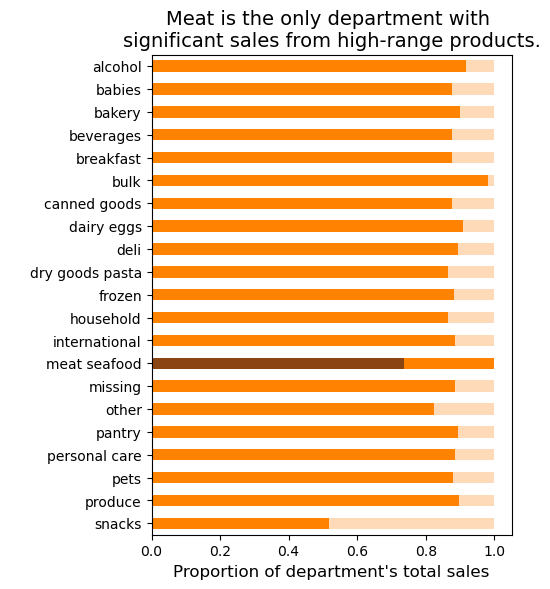

In [183]:
# Create a bar plot showing the proportion 
# of each price group in the gross sales for the dept.

price_range_dept_prop_plot = combo_gross_by_dept_prop.plot(kind='barh',
                   stacked=True,
                   figsize=(6,8),
                   color=colors)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.3)

# Format labels and titles for clarity
#plt.legend(['High-range products', 'Mid-range products', 'Low-range products'], 
 #          loc='upper center', ncol=1)
plt.legend('', frameon=False)
plt.xticks()
plt.xlabel('Proportion of department\'s total sales', size=12)
plt.ylabel(' ')
plt.title('Meat is the only department with \nsignificant sales from high-range products.',
         size=14)

        
plt.show()

In [192]:
# Create filename for export
filename = profile+'_gross_dept_prop.png'
filename

'price_range_gross_dept_prop.png'

In [193]:
# Exporting bar chart
price_range_dept_prop_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [194]:
# Create a temp df for just ranking total spent by dept 
temp = dept_data[['department', 'total_spent_in_dept']].sort_values('total_spent_in_dept', ascending=False)

In [195]:
# Set the department name to be used as the index
temp = temp.set_index('department')

In [196]:
temp

,total_spent_in_dept
department,
produce,"75,660,936.00"
dairy eggs,"44,954,496.00"
beverages,"20,646,084.00"
frozen,"17,289,206.00"
pantry,"15,020,661.00"
snacks,"12,345,538.00"
meat seafood,"11,551,570.00"
bakery,"9,208,026.00"
deli,"8,177,352.00"


In [197]:
temp['total_spent_in_dept'].sum()

252418380.0

In [198]:
# Reclaiming space from all the temp dfs
del gross_by_price_group
del price_range_plot
del gross_price_range_by_dept
del high_gross
del mid_gross
del low_gross
del combo_gross_by_dept
del combo_gross_by_dept_sort
del combo_gross_by_dept_t
del price_range_dept_plot
del temp
del combo_gross_by_dept_prop
del price_range_dept_prop_plot

####     0.6.4 Ordering habits - day of week, time of day, frequency

In [200]:
#Comparing day of the week by profile
dow_profile = pd.DataFrame(df.groupby(profile).order_day_of_week.value_counts().sort_index())
dow_profile

order_day_of_week
price_range        order_day_of_week                   
High-range product 0                              86850
                   1                              69114
                   2                              50615
                   3                              45820
                   4                              45143
                   5                              51612
                   6                              63397
Low-range product  0                            1897714
                   1                            1781804
                   2                            1329747
                   3                            1211300
                   4                            1195305
                   5                            1328512
                   6                            1381377
Mid-range product  0                            4218481
                   1                            3808190
                   2                            2832603
                   3                            2582629
                   4                            2542628
                   5                            2824812
                   6                            3050939

In [202]:
# Rename second column to be more meaningful
dow_profile = dow_profile.rename(columns={'order_day_of_week':'dow_count'})

In [203]:
# Reset the index so the column headers show up correctly
dow_profile = dow_profile.reset_index()

In [204]:
dow_profile

,price_range,order_day_of_week,dow_count
0,High-range product,0,86850
1,High-range product,1,69114
2,High-range product,2,50615
3,High-range product,3,45820
4,High-range product,4,45143
5,High-range product,5,51612
6,High-range product,6,63397
7,Low-range product,0,1897714
8,Low-range product,1,1781804
9,Low-range product,2,1329747


In [206]:
# Calculating the total orders by profiles
dow_profile.loc[dow_profile[profile]==prof1, 'total_orders'] = dow_profile[dow_profile[profile]==prof1].dow_count.sum()
dow_profile.loc[dow_profile[profile]==prof2, 'total_orders'] = dow_profile[dow_profile[profile]==prof2].dow_count.sum()
dow_profile.loc[dow_profile[profile]==prof3, 'total_orders'] = dow_profile[dow_profile[profile]==prof3].dow_count.sum()

dow_profile

,price_range,order_day_of_week,dow_count,total_orders
0,High-range product,0,86850,"412,551.00"
1,High-range product,1,69114,"412,551.00"
2,High-range product,2,50615,"412,551.00"
3,High-range product,3,45820,"412,551.00"
4,High-range product,4,45143,"412,551.00"
5,High-range product,5,51612,"412,551.00"
6,High-range product,6,63397,"412,551.00"
7,Low-range product,0,1897714,"10,125,759.00"
8,Low-range product,1,1781804,"10,125,759.00"
9,Low-range product,2,1329747,"10,125,759.00"


In [218]:
# Calculating the percent of order by day by loyalty status
dow_profile['percent_of_total_by_flag'] = (dow_profile['dow_count']/dow_profile['total_orders'])*100
dow_profile

,price_range,order_day_of_week,dow_count,total_orders,percent_of_total_by_flag
0,High-range product,0,86850,"412,551.00",21.05
1,High-range product,1,69114,"412,551.00",16.75
2,High-range product,2,50615,"412,551.00",12.27
3,High-range product,3,45820,"412,551.00",11.11
4,High-range product,4,45143,"412,551.00",10.94
5,High-range product,5,51612,"412,551.00",12.51
6,High-range product,6,63397,"412,551.00",15.37
7,Low-range product,0,1897714,"10,125,759.00",18.74
8,Low-range product,1,1781804,"10,125,759.00",17.60
9,Low-range product,2,1329747,"10,125,759.00",13.13


In [219]:
# Creating three temp dfs to use for bar chart
prof1_dow_percent = dow_profile.loc[dow_profile[profile] ==prof1, ['order_day_of_week', 'percent_of_total_by_flag']]    
prof2_dow_percent = dow_profile.loc[dow_profile[profile] ==prof2, ['order_day_of_week', 'percent_of_total_by_flag']]    
prof3_dow_percent = dow_profile.loc[dow_profile[profile] ==prof3, ['order_day_of_week', 'percent_of_total_by_flag']]      


In [222]:
# Use order_day_of_week as index
prof1_dow_percent = prof1_dow_percent.set_index('order_day_of_week')
prof2_dow_percent = prof2_dow_percent.set_index('order_day_of_week')
prof3_dow_percent = prof3_dow_percent.set_index('order_day_of_week')

In [223]:
# Name columns to be distinctive
prof1_dow_percent = prof1_dow_percent.rename(columns={'percent_of_total_by_flag': prof1+'_dow_perc'})
prof2_dow_percent = prof2_dow_percent.rename(columns={'percent_of_total_by_flag': prof2+'_dow_perc'})
prof3_dow_percent = prof3_dow_percent.rename(columns={'percent_of_total_by_flag': prof3+'_dow_perc'})

In [224]:
# Merge back into one df for visualization
combo_dow_percent = pd.merge(prof1_dow_percent, prof2_dow_percent, on='order_day_of_week', how='left' )

In [225]:
combo_dow_percent = pd.merge(combo_dow_percent, prof3_dow_percent, on='order_day_of_week', how='left')

In [226]:
combo_dow_percent

,Low-range product_dow_perc,Mid-range product_dow_perc,High-range product_dow_perc
order_day_of_week,,,
0,18.74,19.30,21.05
1,17.60,17.42,16.75
2,13.13,12.96,12.27
3,11.96,11.81,11.11
4,11.80,11.63,10.94
5,13.12,12.92,12.51
6,13.64,13.96,15.37


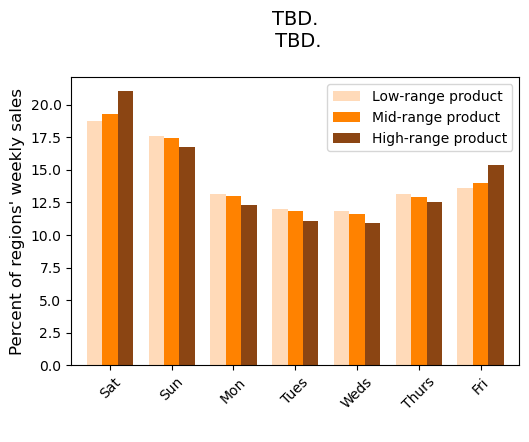

In [232]:
# Create a bar chart showing when different loyalty groups shop most often
dow_bar_by_loyalty = combo_dow_percent.plot(kind='bar', width=0.75, color = colors_r)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity
plt.ylabel('Percent of regions\' weekly sales', size=12)
plt.xticks(dow_xticks, dow, rotation = 45)
plt.xlabel(" ")
plt.xticks(rotation=45)
plt.legend(labels = labels_inc, loc = 'upper right')
plt.title ("TBD.\n TBD.\n", size=14)

plt.show()

In [233]:
# Create filename for export
filename = profile+'_dow.png'
filename

'price_range_dow.png'

In [234]:
# Exporting bar chart
dow_bar_by_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [239]:
# Creating three-column subset of the 30% df
df_profile_sm = pd.DataFrame(df.groupby([profile, 'order_hour_of_day']).price.sum())

In [240]:
# First reset the index for manipulation of data
df_profile_sm = df_profile_sm.reset_index()

In [241]:
df_profile_sm.head()

,price_range,order_hour_of_day,price
0,High-range product,0,"56,497.60"
1,High-range product,1,"28,821.20"
2,High-range product,2,"18,543.10"
3,High-range product,3,"13,087.90"
4,High-range product,4,"14,162.70"


In [242]:
# Pulling each of the profile groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

prof1_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof1])
prof2_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof2])
prof3_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof3])

In [245]:
# Rename columns to be more desciptive
prof1_hod.rename(columns={'price': prof1+'_total_hod'}, inplace=True)
prof2_hod.rename(columns={'price': prof2+'_total_hod'}, inplace=True)
prof3_hod.rename(columns={'price': prof3+'_total_hod'}, inplace=True)


In [247]:
# Removing unnecessary columns
prof1_hod = prof1_hod.drop(columns = [profile])
prof2_hod = prof2_hod.drop(columns = [profile])
prof3_hod = prof3_hod.drop(columns = [profile])

In [248]:
# Merge temp dfs
combo_profile_hod = prof1_hod.merge(prof2_hod, on = 'order_hour_of_day', how='left')

In [249]:
combo_profile_hod = combo_profile_hod.merge(prof3_hod, on = 'order_hour_of_day', how='left')

In [250]:
# Set the department name to be used as the index
combo_profile_hod = combo_profile_hod.set_index('order_hour_of_day')

In [251]:
combo_profile_hod.shape

(24, 3)

In [254]:
combo_profile_hod

,Low-range product_total_hod,Mid-range product_total_hod,High-range product_total_hod
order_hour_of_day,,,
0,"206,037.20","1,446,051.75","56,497.60"
1,"108,627.40","765,525.38","28,821.20"
2,"65,963.10","456,433.59","18,543.10"
3,"48,049.50","340,193.69","13,087.90"
4,"49,644.10","353,444.69","14,162.70"
5,"81,756.20","584,905.00","21,751.70"
6,"270,791.41","1,923,548.75","76,327.00"
7,"830,983.81","5,899,006.00","236,877.20"
8,"1,618,468.88","11,316,459.00","447,849.31"


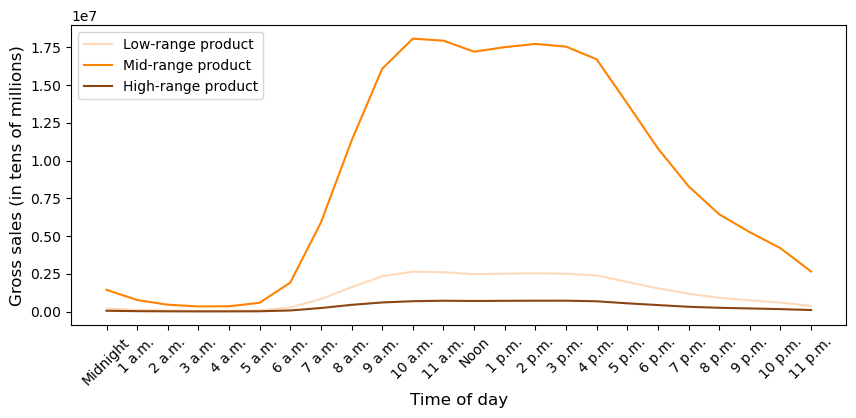

In [259]:

# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,5))

# Creating the plot
profile_hod_line = sns.lineplot(data= combo_profile_hod[[prof1+'_total_hod', prof2+'_total_hod', prof3+'_total_hod']], 
                            palette= colors_r, 
                            dashes = False )

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.legend(labels = labels_inc, 
           loc='upper left', ncol=1)
plt.xticks(hod_xticks, hod, rotation = 45)
plt.xlabel("Time of day", size = 12 )

plt.ylabel("Gross sales (in tens of millions)", size = 12 )

#plt.title ("TBD.", size=16)

plt.show()

In [261]:
# Create a cross tabulation to show the proportions of the 
# loyalty groups in each frequent_shopper category
cross_tab_profile_freq = pd.crosstab(index=df[profile],
                            columns=df['frequent_shopper'],
                            normalize='index')
cross_tab_profile_freq

frequent_shopper,Frequent customer,Non-frequent customer,Regular customer
price_range,,,
High-range product,0.66,0.11,0.23
Low-range product,0.67,0.10,0.22
Mid-range product,0.68,0.10,0.22
